In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#导入数据
train_data = pd.read_csv('train.csv')

In [3]:
#观察数据
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 绘图观察属性分布

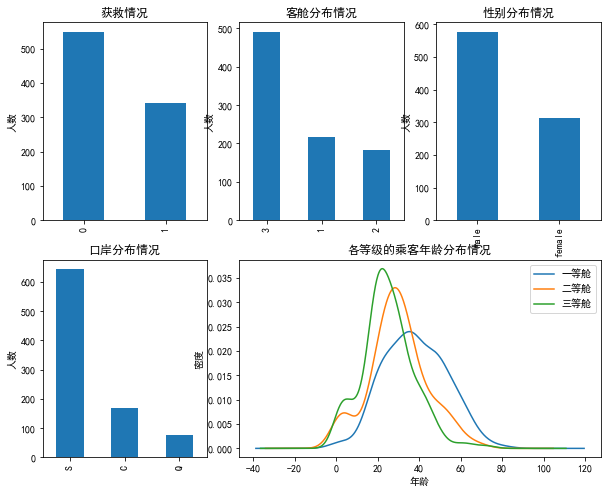

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

#设置字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#创建figure
fig = plt.figure(figsize = (10, 8))

#子图1
plt.subplot2grid((2,3),(0,0))
train_data.Survived.value_counts().plot(kind = 'bar')
plt.title(u"获救情况")
plt.ylabel(u"人数")

#子图2
plt.subplot2grid((2,3),(0,1))
train_data.Pclass.value_counts().plot(kind = 'bar')
plt.title(u"客舱分布情况")
plt.ylabel(u"人数")

#子图3
plt.subplot2grid((2,3),(0,2))
train_data.Sex.value_counts().plot(kind = 'bar')
plt.title(u"性别分布情况")
plt.ylabel(u"人数")

#子图4
plt.subplot2grid((2,3),(1,0))
train_data.Embarked.value_counts().plot(kind = 'bar')
plt.title(u"口岸分布情况")
plt.ylabel(u"人数")

#子图5
plt.subplot2grid((2,3),(1,1),colspan=2)
train_data.Age[train_data.Pclass == 1].plot(kind = 'kde')
train_data.Age[train_data.Pclass == 2].plot(kind = 'kde')
train_data.Age[train_data.Pclass == 3].plot(kind = 'kde')
plt.xlabel(u"年龄")
plt.ylabel(u"密度")
plt.title(u"各等级的乘客年龄分布情况")
plt.legend((u'一等舱',u'二等舱',u'三等舱'), loc='best')

#### 结论：
获救人数不到总人数的一半；三等舱人数最多，几乎等于一等舱和二等舱人数之和；男性数量约为女性数量的两倍；登船口岸主要集中在S港口；一等舱乘客年龄主要集中在40岁，二等舱在30岁，三等舱在20岁左右。

#### 属性与获救情况的相关性分析

#### 等级属性

<Figure size 432x288 with 0 Axes>

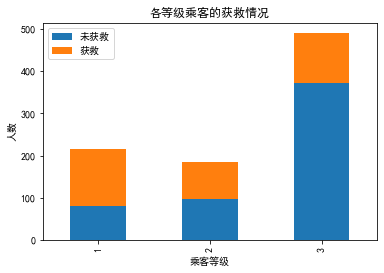

In [7]:
fig = plt.figure()

survived_0 = train_data.Pclass[train_data.Survived == 0].value_counts()
survived_1 = train_data.Pclass[train_data.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救': survived_0, u'获救':survived_1})
df.plot(kind = 'bar', stacked=True)
plt.title(u'各等级乘客的获救情况')
plt.xlabel(u'乘客等级')
plt.ylabel(u'人数')
plt.show()

乘客等级越高最后的获救概率也越高。

#### 性别属性

<Figure size 432x288 with 0 Axes>

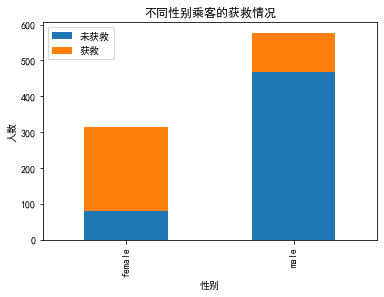

In [8]:
fig = plt.figure()

survived_0 = train_data.Sex[train_data.Survived == 0].value_counts()
survived_1 = train_data.Sex[train_data.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救':survived_0, u'获救':survived_1})
df.plot(kind = 'bar', stacked = True)
plt.title(u'不同性别乘客的获救情况')
plt.xlabel(u'性别')
plt.ylabel(u'人数')
plt.show()

女性获救比例远高于男性。

#### 港口属性

<Figure size 432x288 with 0 Axes>

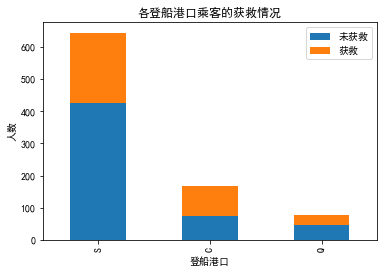

In [9]:
fig = plt.figure()

survived_0 = train_data.Embarked[train_data.Survived == 0].value_counts()
survived_1 = train_data.Embarked[train_data.Survived == 1].value_counts()
df = pd.DataFrame({u'未获救':survived_0,u'获救':survived_1})
df.plot(kind='bar', stacked=True)
plt.title(u"各登船港口乘客的获救情况")
plt.xlabel(u"登船港口") 
plt.ylabel(u"人数") 

plt.show()

#### 兄弟姐妹与孩子父母数量

In [10]:
gg = train_data.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(gg.count()['PassengerId'])
print(df)

gg = train_data.groupby(['Parch', 'Survived'])
df = pd.DataFrame(gg.count()['PassengerId'])
print(df)

                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1


属性值相同情况下，获救与未获救人数相当，说明Parch与Sibsp属性对Survived与否影响不大。

#### cabin仅有204个是非空的，从是否非空的角度来考量

Text(0, 0.5, '人数')

<Figure size 432x288 with 0 Axes>

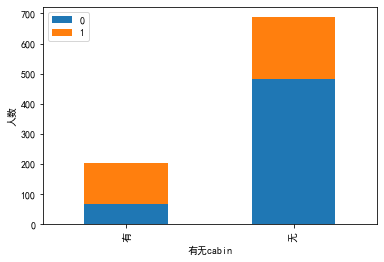

In [11]:
fig = plt.figure()

survived_canbin_1 = train_data.Survived[pd.notnull(train_data.Cabin)].value_counts()
survived_canbin_0 = train_data.Survived[pd.isnull(train_data.Cabin)].value_counts()
df = pd.DataFrame({u'有':survived_canbin_1, u'无':survived_canbin_0}).transpose()
df.plot(kind='bar', stacked=True)
plt.xlabel(u'有无cabin')
plt.ylabel(u'人数')

有cabin的乘客获救概率要高于没有cabin的乘客。

#### 数据预处理

首先处理缺失数据：age和cabin，使用RandomForest

In [14]:
from sklearn.ensemble import RandomForestRegressor

## 填补缺失的年龄属性
def set_missing_ages(df):
    
    # 取出所有数值型特征用于预测年龄
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
    
    # 乘客分为已知年龄和未知年龄两组
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    
    # 分离输入和输出
    y = known_age[:, 0]
    X = known_age[:, 1:]
    
    #训练
    rfr = RandomForestRegressor(random_state=0, n_estimators=1000, n_jobs=-1)
    rfr.fit(X, y)
    
    #预测
    predictedAges = rfr.predict(unknown_age[:, 1:])
    
    #用预测结果填补缺失值
    df.loc[(df.Age.isnull()), 'Age'] = predictedAges
    
    return df, rfr
    #print(age_df[age_df.Age.isnull()])

def set_cabin_type(df):
    
    df.loc[(df.Cabin.notnull()), 'Cabin'] = "yes"
    df.loc[(df.Cabin.isnull()), 'Cabin'] = "no"
    
    return df

train_data, rfr = set_missing_ages(train_data)
train_data = set_cabin_type(train_data)
#set_missing_ages(train_data)

#### 把部分属性转为数值化属性

In [22]:
dummies_Cabin = pd.get_dummies(train_data['Cabin'], prefix = 'Cabin')

dummies_Embarked = pd.get_dummies(train_data['Embarked'], prefix= 'Embarked')

dummies_Sex = pd.get_dummies(train_data['Sex'], prefix= 'Sex')

dummies_Pclass = pd.get_dummies(train_data['Pclass'], prefix= 'Pclass')

df = pd.concat([train_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)

df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)


#### 对特征进行标准化处理

In [25]:
import sklearn

scaler = sklearn.preprocessing.StandardScaler()
age_scale_param = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scaled'] = scaler.fit_transform(df['Age'].values.reshape(-1,1), age_scale_param)
fare_scale_param = scaler.fit(df['Fare'].values.reshape(-1,1))
df['Fare_scaled'] = scaler.fit_transform(df['Fare'].values.reshape(-1,1), fare_scale_param)
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1,-0.561202,-0.502445
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0,0.613240,0.786845
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,1,-0.267591,-0.488854
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,1,0,0,0.393032,0.420730
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1,0.393032,-0.486337


#### 逻辑回归建模

In [26]:
from sklearn import linear_model

#用正则取出相关属性
train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

y = train_np[:, 0]
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l1', tol=1e-6)
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=1e-06, verbose=0,
                   warm_start=False)

#### 对data.csv做数据预处理

In [30]:
test_data = pd.read_csv('test.csv')
test_data.loc[(test_data.Fare.isnull(), 'Fare')] = 0

tmp_df = test_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[test_data.Age.isnull()].values

#把age补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
test_data.loc[ (test_data.Age.isnull()), 'Age' ] = predictedAges

ata_test = set_cabin_type(test_data)
dummies_Cabin = pd.get_dummies(test_data['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(test_data['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(test_data['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(test_data['Pclass'], prefix= 'Pclass')


df_test = pd.concat([test_data, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
df_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin_no,Cabin_yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,34.5,0,0,7.8292,1,0,0,1,0,0,1,0,0,1,0.307389,-0.496637
1,893,47.0,1,0,7.0000,1,0,0,0,1,1,0,0,0,1,1.255831,-0.511497
2,894,62.0,0,0,9.6875,1,0,0,1,0,0,1,0,1,0,2.393961,-0.463335
3,895,27.0,0,0,8.6625,1,0,0,0,1,0,1,0,0,1,-0.261677,-0.481704
4,896,22.0,1,1,12.2875,1,0,0,0,1,1,0,0,0,1,-0.641053,-0.416740


In [32]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)

result = pd.DataFrame({'PassengerId':test_data['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

#### 逻辑回归baseline model的优化

模型系数

In [33]:
pd.DataFrame({"columns":list(train_df.columns)[1:], "coef":list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.34399380344828584]
1,Parch,[-0.1050554244105623]
2,Cabin_no,[-0.12019889019824602]
3,Cabin_yes,[0.7823363709064923]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.41695390650782244]
7,Sex_female,[2.0764058771431904]
8,Sex_male,[-0.5575112947339113]
9,Pclass_1,[0.3403846271689624]


观察可知：1.兄弟姐妹数量与获救概率一定程度的反相关；2.有Cabin的乘客获救概率更高；3.性别女的属性可以大大提高获救概率；4.三等舱和港口S会拉低获救概率；5.年龄与获救概率成反相关。

#### 交叉验证

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split

clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]
print(cross_val_score(clf, X, y, cv=5))

[0.81564246 0.81564246 0.78651685 0.78651685 0.81355932]


In [37]:
# 分割数据，按照 训练数据:cv数据 = 7:3的比例
split_train, split_cv = train_test_split(df, test_size=0.3, random_state=42)

train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# 生成模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.values[:,1:], train_df.values[:,0])

# 对cross validation数据进行预测
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

# 与实际结果进行比较，筛出预测错误的实例
origin_data_train = pd.read_csv('train.csv')
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != cv_df.values[:,0]]['PassengerId'].values)]
bad_cases.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C


进一步优化的想法：1. Age属性不使用随机森林回归得到，而是根据Name中Mr、Mrs、Miss等的平均值进行填充。 2. 用Pclass和Sex属性做一个复合属性。 3.如果名字里面有Mrs，而Parch>1的，猜测她可能是一个母亲，获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0。 4.可能考虑将Age根据一定步长做离散化处理。